In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data = pd.read_csv("titanic/train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [8]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
clf.score(X_train, y_train)

0.8406040268456376

In [16]:
clf.score(X_test, y_test)

0.8067796610169492

In [17]:
max_depth_values = range(1, 100)

In [18]:
scores_data = pd.DataFrame()

In [19]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                   'test_score': [test_score],
                                   'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [20]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [21]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set-type', value_name='score')

In [22]:
scores_data_long[scores_data_long['set-type'] == 'cross_val_score'].head(20)

,max_depth,set-type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.790280
207,10,cross_val_score,0.796989


<AxesSubplot: xlabel='max_depth', ylabel='score'>

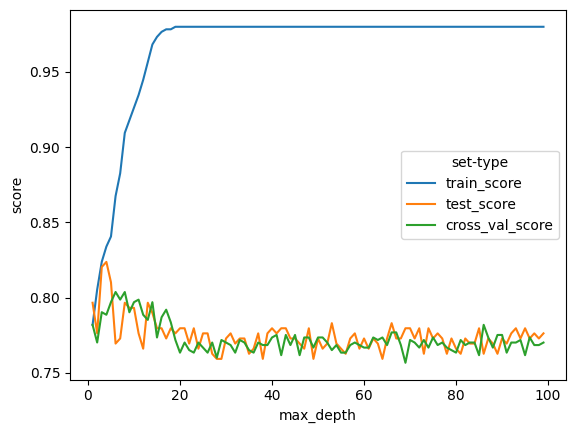

In [23]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set-type')

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [26]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7932203389830509

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
clf = tree.DecisionTreeClassifier()

In [29]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [30]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5) 

In [31]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [32]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [33]:
best_clf = grid_search_cv_clf.best_estimator_

In [34]:
best_clf.score(X_test, y_test)

0.7898305084745763

In [35]:
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

In [36]:
y_pred = best_clf.predict(X_test)

In [37]:
precision_score(y_test, y_pred)

0.8152173913043478

In [38]:
recall_score(y_test, y_pred)

0.625

In [39]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [40]:
y_predicted_prob

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<AxesSubplot: >

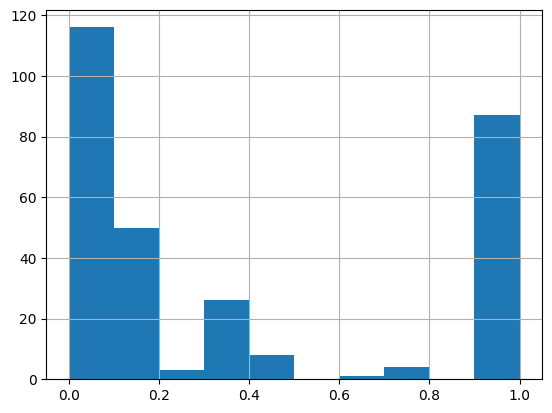

In [41]:
pd.Series(y_predicted_prob[:,1]).hist()

In [42]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)

In [43]:
precision_score(y_test, y_pred)

0.7441860465116279

In [44]:
recall_score(y_test, y_pred)

0.8

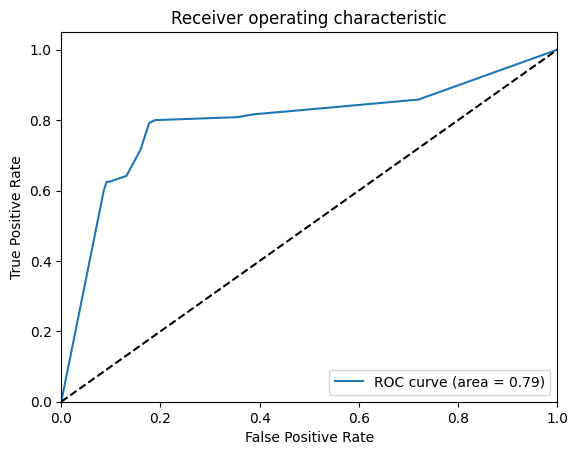

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {round(roc_auc,2)})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')

In [46]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [47]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

[Text(0.5, 0.875, 'x[6] <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(0.3, 0.625, 'x[0] <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(0.2, 0.375, 'x[4] <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(0.1, 0.125, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]'),
 Text(0.3, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.4, 0.375, 'entropy = 0.996\nsamples = 99\nvalue = [53, 46]'),
 Text(0.7, 0.625, 'x[1] <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(0.6, 0.375, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.8, 0.375, 'x[4] <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(0.7, 0.125, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(0.9, 0.125, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]')]

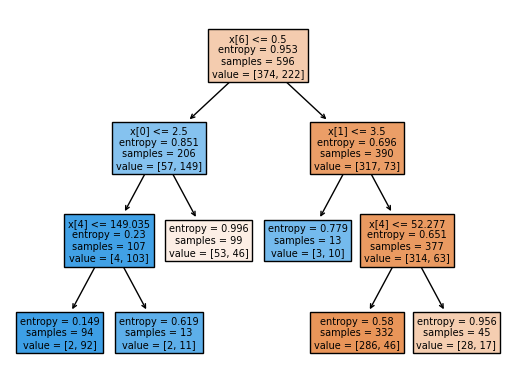

In [48]:
tree.plot_tree(clf, filled=True)

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
clf = tree.DecisionTreeClassifier()

In [62]:
params = {"criterion": ["gini", "entropy"], 'max_depth': range(1,30), 'min_samples_split': range(1,100), 'min_samples_leaf': range(1,100)}

In [63]:
best_clf = RandomizedSearchCV(clf, params, cv=5)

In [64]:
best_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 30),
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(1, 100)})

[Text(0.5588235294117647, 0.95, 'x[5] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.35294117647058826, 0.85, 'x[1] <= 8.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.29411764705882354, 0.75, 'gini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.4117647058823529, 0.75, 'x[4] <= 52.277\ngini = 0.275\nsamples = 370\nvalue = [309, 61]'),
 Text(0.35294117647058826, 0.65, 'x[0] <= 1.5\ngini = 0.234\nsamples = 325\nvalue = [281, 44]'),
 Text(0.29411764705882354, 0.55, 'gini = 0.375\nsamples = 44\nvalue = [33, 11]'),
 Text(0.4117647058823529, 0.55, 'x[7] <= 0.5\ngini = 0.207\nsamples = 281\nvalue = [248, 33]'),
 Text(0.35294117647058826, 0.45, 'x[4] <= 8.238\ngini = 0.188\nsamples = 247\nvalue = [221, 26]'),
 Text(0.23529411764705882, 0.35, 'x[4] <= 7.91\ngini = 0.236\nsamples = 132\nvalue = [114, 18]'),
 Text(0.17647058823529413, 0.25, 'x[4] <= 7.871\ngini = 0.177\nsamples = 92\nvalue = [83, 9]'),
 Text(0.11764705882352941, 0.15, 'x[4] <= 7.746\ngini = 0.2

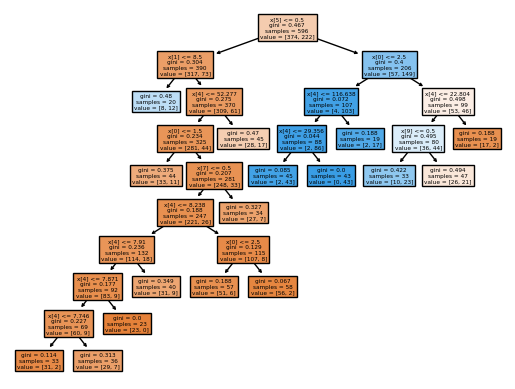

In [67]:
tree.plot_tree(best_clf.best_estimator_, filled=True)

In [68]:
best_clf.best_score_

0.8037254901960784

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
clf_rf = RandomForestClassifier()

In [71]:
params = {'n_estimators': [10,20, 30], 'max_depth': [2,5,7,10]}

In [72]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv = 5)

In [74]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [75]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [77]:
best_clf = grid_search_cv_clf.best_estimator_

In [78]:
best_clf.score(X_test, y_test)

0.7898305084745763

In [81]:
feature_importances = best_clf.feature_importances_

In [83]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [86]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.224612
4,Fare,0.202372
1,Age,0.176326
5,Sex_female,0.156884
0,Pclass,0.089364
2,SibSp,0.058546
3,Parch,0.044413
7,Embarked_C,0.021636
9,Embarked_S,0.017116
8,Embarked_Q,0.008730


In [ ]:
# 3.2.7

In [89]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv")

In [90]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
x_train = heart_df.drop(['target'], axis=1)

In [96]:
y_train = heart_df.target

In [97]:
np.random.seed(0)

In [98]:
rf = RandomForestClassifier(10, max_depth=5)

In [100]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot: >

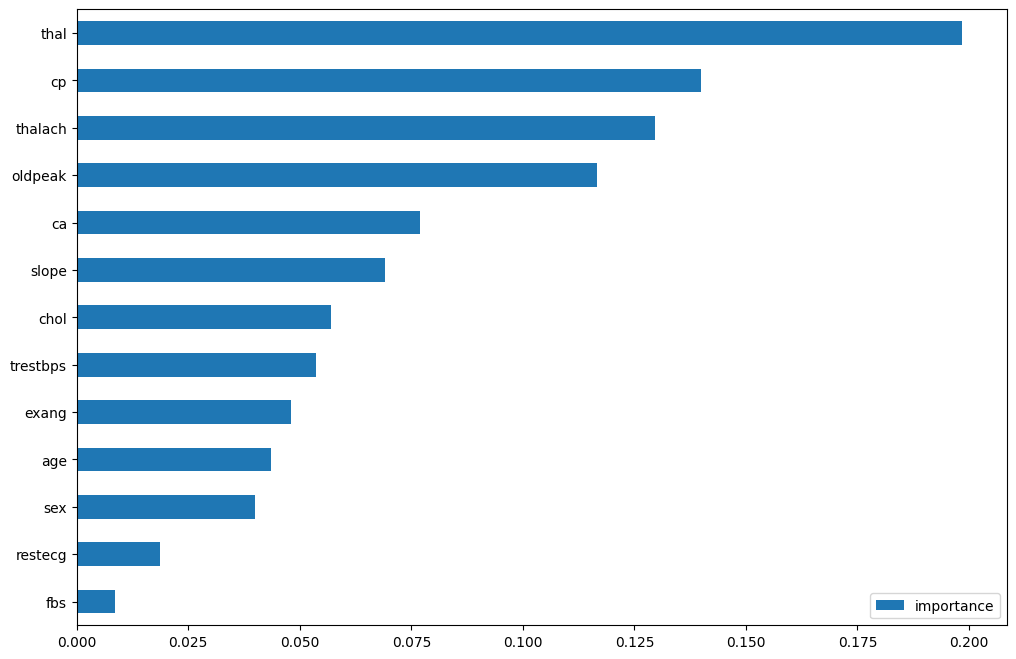

In [101]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))